In [ ]:
import pandas as pd

# Load the dataset (modify the file path if needed)
df = pd.read_csv("/content/tipsdataset.csv")

# Basic inspection
print(df.info())  # Data types and missing values
print(df.describe())  # Summary statistics

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
total_bill    0
tip           0
gender        0
smoker        0
day           0
t

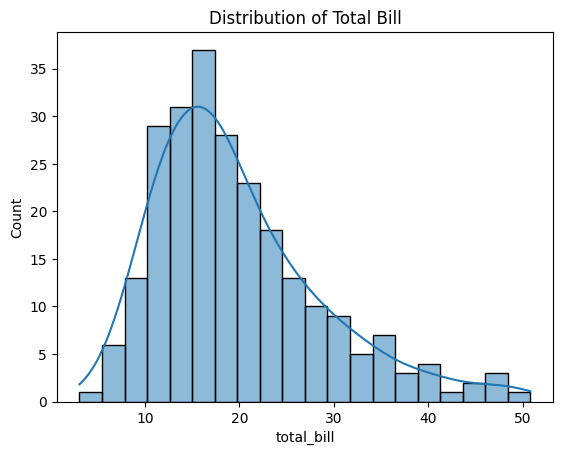

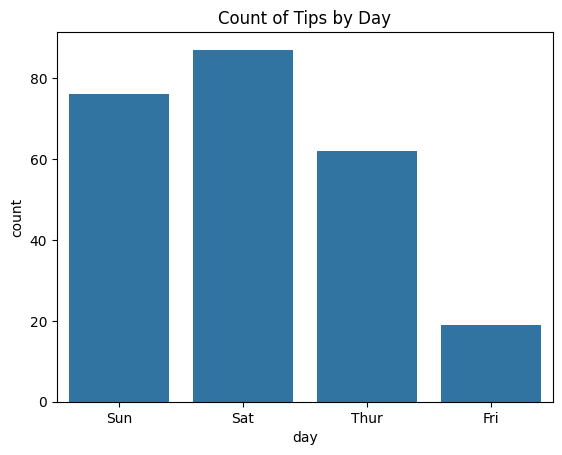

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of total_bill
sns.histplot(df['total_bill'], bins=20, kde=True)
plt.title('Distribution of Total Bill')
plt.show()

# Count plot for categorical variables
sns.countplot(x='day', data=df)
plt.title("Count of Tips by Day")
plt.show()

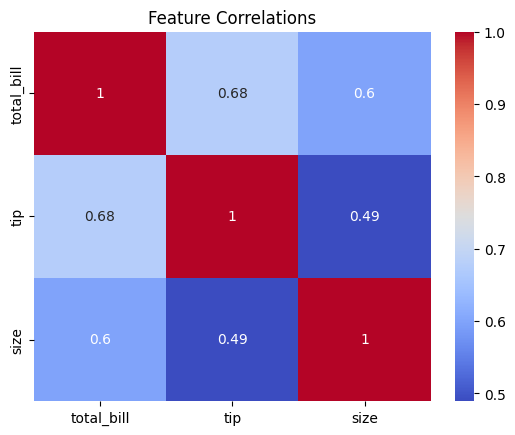

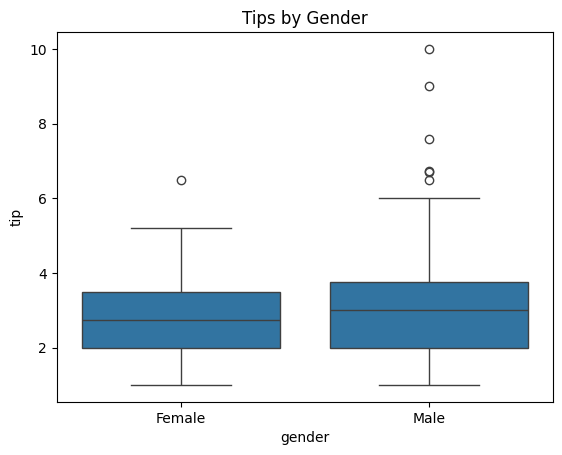

In [ ]:
# Correlation heatmap
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

# Boxplot of tips by gender
sns.boxplot(x='gender', y='tip', data=df)
plt.title("Tips by Gender")
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# T-test for tips between smokers and non-smokers
smoker_tips = df[df['smoker'] == 'Yes']['tip']
non_smoker_tips = df[df['smoker'] == 'No']['tip']

t_stat, p_val = ttest_ind(smoker_tips, non_smoker_tips)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 0.09222805186888201, P-value: 0.9265931522244976


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Convert categorical variables to numeric (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop(columns=['tip'])
y = df['tip']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Model performance
print(f"R^2 Score: {model.score(X_test, y_test)}")

R^2 Score: 0.43730181943482493


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load dataset
df = pd.read_csv("/content/tipsdataset.csv")

# Encode categorical moderator variable (smoker: Yes=1, No=0)
df['smoker_binary'] = df['smoker'].map({'Yes': 1, 'No': 0})

# Create interaction term
df['total_bill_smoker'] = df['total_bill'] * df['smoker_binary']

# Moderation Model: Tip ~ Total_Bill + Smoker + Interaction
mod_model = smf.ols("tip ~ total_bill + smoker_binary + total_bill_smoker", data=df).fit()

# Print results
print(mod_model.summary())



                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     81.95
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           1.56e-36
Time:                        11:41:40   Log-Likelihood:                -338.91
No. Observations:                 244   AIC:                             685.8
Df Residuals:                     240   BIC:                             699.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3601      0.20

In [ ]:
from statsmodels.stats.mediation import Mediation

# Step 1: Check total_bill → size (Mediator Model)
med_model_a = smf.ols("size ~ total_bill", data=df) # Remove .fit() here
print(med_model_a.fit().summary()) # Fit the model after printing summary

# Step 2: Check size → tip controlling for total_bill (DV Model)
med_model_b = smf.ols("tip ~ total_bill + size", data=df) # Remove .fit() here
print(med_model_b.fit().summary()) # Fit the model after printing summary

# Mediation effect using formal test
mediation = Mediation(med_model_b, med_model_a, "total_bill", "size").fit()
print(mediation.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     134.9
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           4.39e-25
Time:                        11:44:17   Log-Likelihood:                -279.42
No. Observations:                 244   AIC:                             562.8
Df Residuals:                     242   BIC:                             569.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3049      0.119     10.934      0.0

In [ ]:
# Interaction term for moderated mediation
df['size_smoker'] = df['size'] * df['smoker_binary']

# Moderated Mediation Model
mod_med_model = smf.ols("tip ~ total_bill + size + smoker_binary + size_smoker", data=df).fit()

# Print results
print(mod_med_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     54.37
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           1.51e-32
Time:                        11:47:31   Log-Likelihood:                -346.00
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     239   BIC:                             719.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4902      0.235      2.090

<ipython-input-3-cf5b727ded9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="time", y="total_bill", data=df, palette="coolwarm")


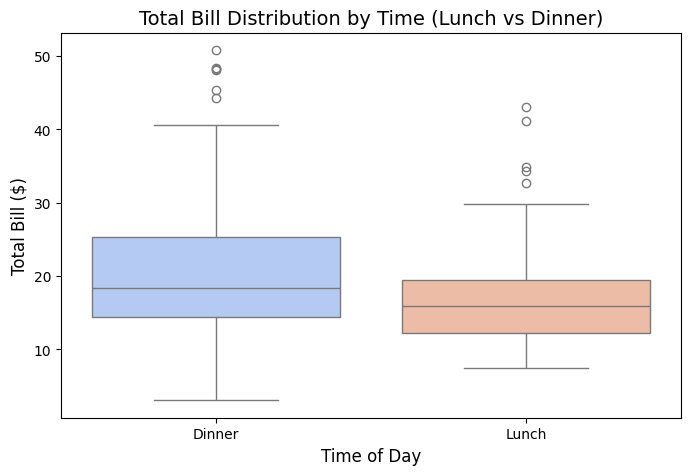

In [ ]:
# Create a boxplot for Total Bill vs. Time
plt.figure(figsize=(8, 5))
sns.boxplot(x="time", y="total_bill", data=df, palette="coolwarm")

# Add title and labels
plt.title("Total Bill Distribution by Time (Lunch vs Dinner)", fontsize=14)
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Total Bill ($)", fontsize=12)

# Show the plot
plt.show()

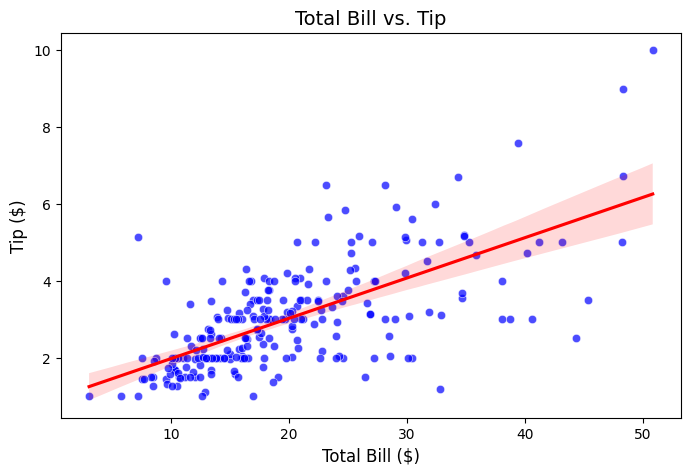

In [ ]:
# Create a scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x="total_bill", y="tip", data=df, alpha=0.7, color="blue")
sns.regplot(x="total_bill", y="tip", data=df, scatter=False, color="red")  # Regression line

# Add title and labels
plt.title("Total Bill vs. Tip", fontsize=14)
plt.xlabel("Total Bill ($)", fontsize=12)
plt.ylabel("Tip ($)", fontsize=12)

# Show the plot
plt.show()

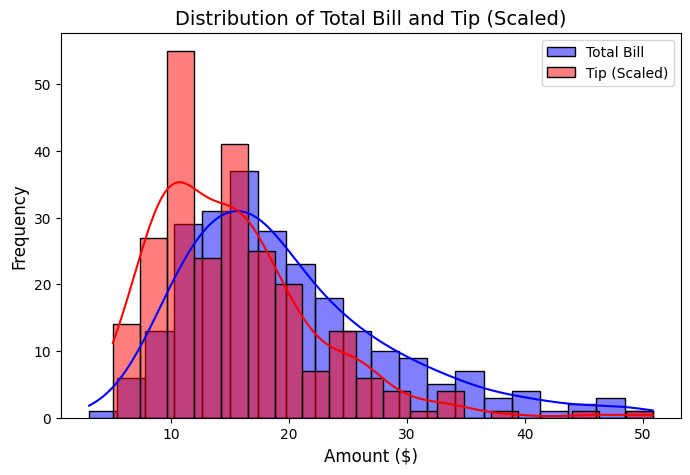

In [ ]:
# Normalize tip values to match the scale of total_bill
df['tip_scaled'] = df['tip'] * (df['total_bill'].max() / df['tip'].max())

# Create histogram for total_bill and scaled tip
plt.figure(figsize=(8, 5))

sns.histplot(df['total_bill'], bins=20, kde=True, color="blue", label="Total Bill", alpha=0.5)
sns.histplot(df['tip_scaled'], bins=20, kde=True, color="red", label="Tip (Scaled)", alpha=0.5)

# Add title and labels
plt.title("Distribution of Total Bill and Tip (Scaled)", fontsize=14)
plt.xlabel("Amount ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()

# Show the plot
plt.show()

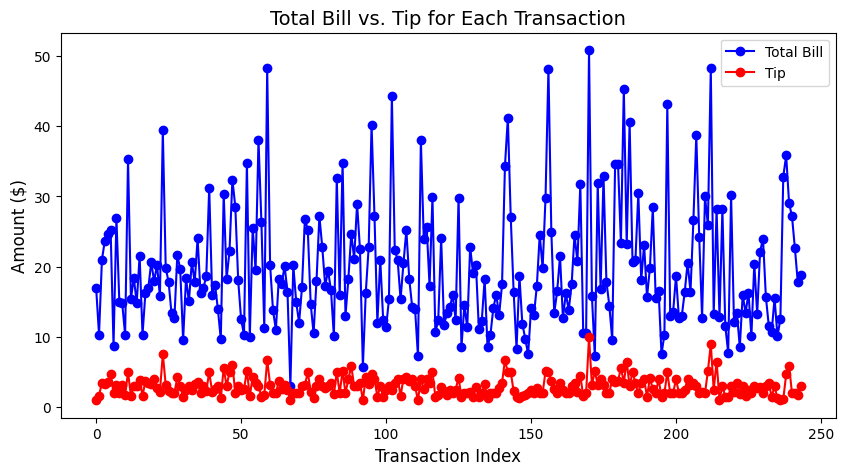

In [ ]:
# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['total_bill'], marker='o', linestyle='-', color='blue', label='Total Bill')
plt.plot(df.index, df['tip'], marker='o', linestyle='-', color='red', label='Tip')

# Add title and labels
plt.title("Total Bill vs. Tip for Each Transaction", fontsize=14)
plt.xlabel("Transaction Index", fontsize=12)
plt.ylabel("Amount ($)", fontsize=12)
plt.legend()

# Show the plot
plt.show()